### 시험 문제 예제
1. 서울역의 시간대별로 승차 인원 선 그래프를 그리세요
1. 아침9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요
1. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요
1. 하루 중 승차 인원이 가장 많은 시간은 언제입니까 (예 1시~2시)  
1. 무임 하차 비율이 가장 높은 역 5개를 찾으세요

In [29]:
#가산점
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                   sheet_name=3, encoding='cp949',index_col=3, skiprows=1)
df.shape

(597, 52)

In [43]:
data = df.iloc[:, 3:-1] 

In [44]:
data = data.replace(',', '', regex=True) # , 없애기

In [49]:
data = data.astype(np.int) # 정수로 변환

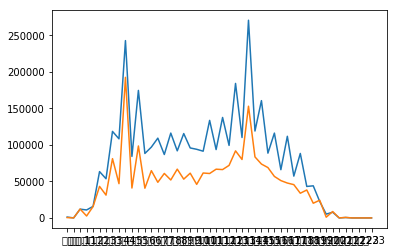

In [55]:
#서울역이 여러개다 더하자
seoul = data.loc['서울역']
plt.plot(np.sum(seoul[::2], axis=0)) #짝수 : 승차
plt.plot(np.sum(seoul[1::2], axis=0)) #홀수 : 하차

2. 아침9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으시고 bar 그래프로 그리세요

In [59]:
col = 11
morning_10_off = data.iloc[:, col]

In [64]:
y = morning_10_off.sort_values(ascending=False)[:5]
y

강남          372474
삼성(무역센터)    285440
역삼          285044
선릉          235595
가산디지털단지     216339
Name: 하차.5, dtype: int32

<BarContainer object of 5 artists>

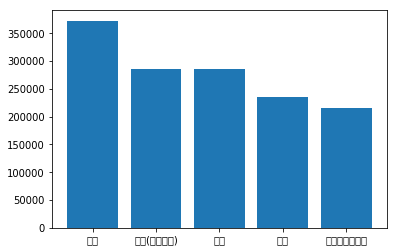

In [67]:
plt.bar(y.index, y)

3. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요

In [74]:
# 짝수 : 승차, 홀수 : 하차
data.head()
승차 = data.iloc[:, ::2]
하차 = data.iloc[:, 1::2]

In [77]:
승차합 = np.sum(승차, axis=1)
하차합 = np.sum(하차, axis=1)
비율 = 하차합/승차합

In [79]:
비율.sort_values(ascending=False)[:5]

서울역      1.730587
인천       1.688396
선릉       1.683228
고속터미널    1.540680
공덕       1.317531
dtype: float64

4. 하루 중 승차 인원이 가장 많은 시간은 언제입니까 (예 1시~2시) argmax 문제

In [95]:
승하차인원 = np.sum(data, axis=0) #역하고는 상관 없으므로 sum
#승차인원 : 짝수위치
승차인원 = 승하차인원[::2]
4 + np.argmax(승차인원.values),'시' #시작시간 04:00

(18, '시')

In [90]:
승차인원.values

array([  136144,  3586585,  7173093, 18673526, 21660035, 14028472,
       10597036, 10488157, 11472241, 11989828, 11825103, 13071881,
       15115972, 18553044, 24606001, 14232425, 11346789, 10917666,
        9124017,  4163994,   575460,      456,      128,        0],
      dtype=int64)

5. 유임 하차에 비해 무임 하차 비율이 가장 높은 역 5개를 찾아서 그래프를 그리세요

In [98]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                   sheet_name=2, encoding='cp949',index_col=3, skiprows=0)
df.shape

(597, 8)

In [101]:
subway = df.iloc[:, 3:-1]

In [103]:
subway = subway.replace(',','', regex=True)
subway = subway.astype('int')

In [106]:
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
비율 = 무임하차/유임하차

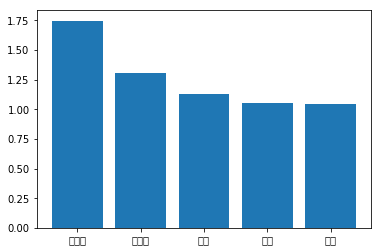

In [118]:
y = 비율.sort_values(ascending=False)[:5]
m = plt.bar(y.index, y)
#m = plt.pie(y, labels=y.index, autopct='%d')